The goal of this case study is to predict the readmission of a diabetes patient within 30 days of hospitalization. 

The data provided 10, 1766 values and 49 columns each associated with a unique encounter_id.

### Import Packages

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Read in Data

In [32]:
df  = pd.read_csv('diabetic_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [27]:
df['A1Cresult']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
101761     >8
101762    NaN
101763    NaN
101764    NaN
101765    NaN
Name: A1Cresult, Length: 101766, dtype: object

In [5]:
id_mapping  = pd.read_csv('IDs_mapping.csv')
id_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   admission_type_id  65 non-null     object
 1   description        62 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


#### Readmission (Target Variable) Analysis

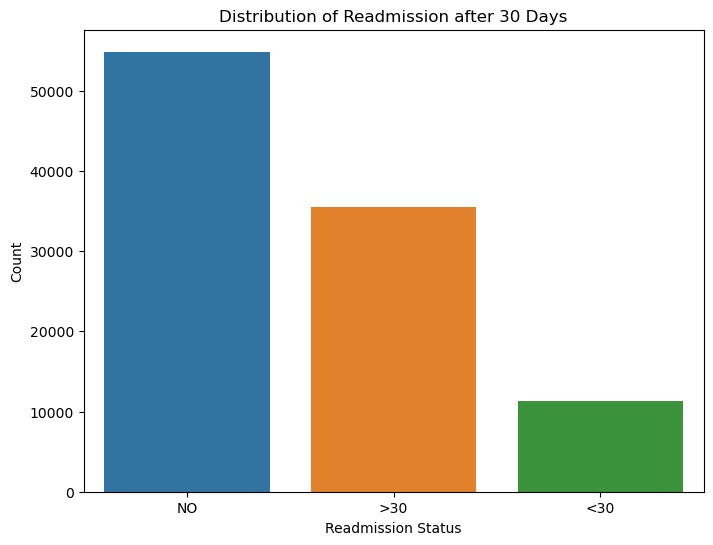

In [7]:


# Assuming your DataFrame is named df
plt.figure(figsize=(8, 6))
sns.countplot(x='readmitted', data=df)
plt.title('Distribution of Readmission after 30 Days')
plt.xlabel('Readmission Status')
plt.ylabel('Count')
plt.show()

In [33]:
df['readmitted'] = df['readmitted'].replace({'NO': 0, '>30': 0, '<30': 1})

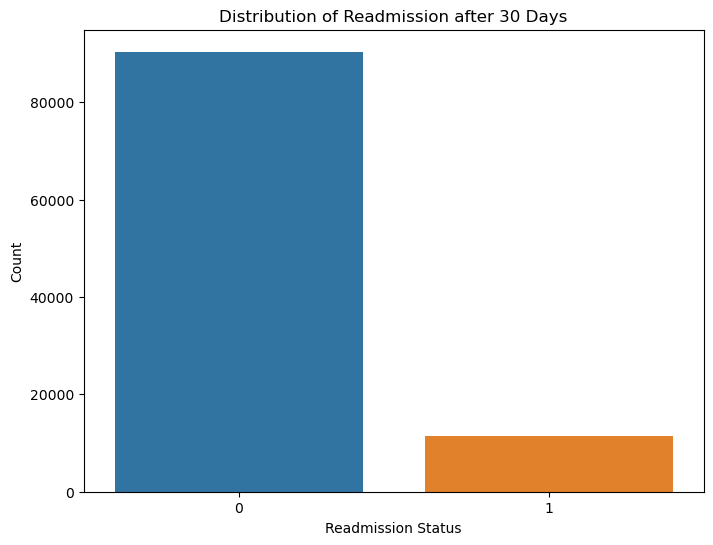

In [34]:

# Assuming your DataFrame is named df
plt.figure(figsize=(8, 6))
sns.countplot(x='readmitted', data=df)
plt.title('Distribution of Readmission after 30 Days')
plt.xlabel('Readmission Status')
plt.ylabel('Count')
plt.show()

###  Missing Values

In [24]:
na_count = df.isnull().sum() 
print(na_count)

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

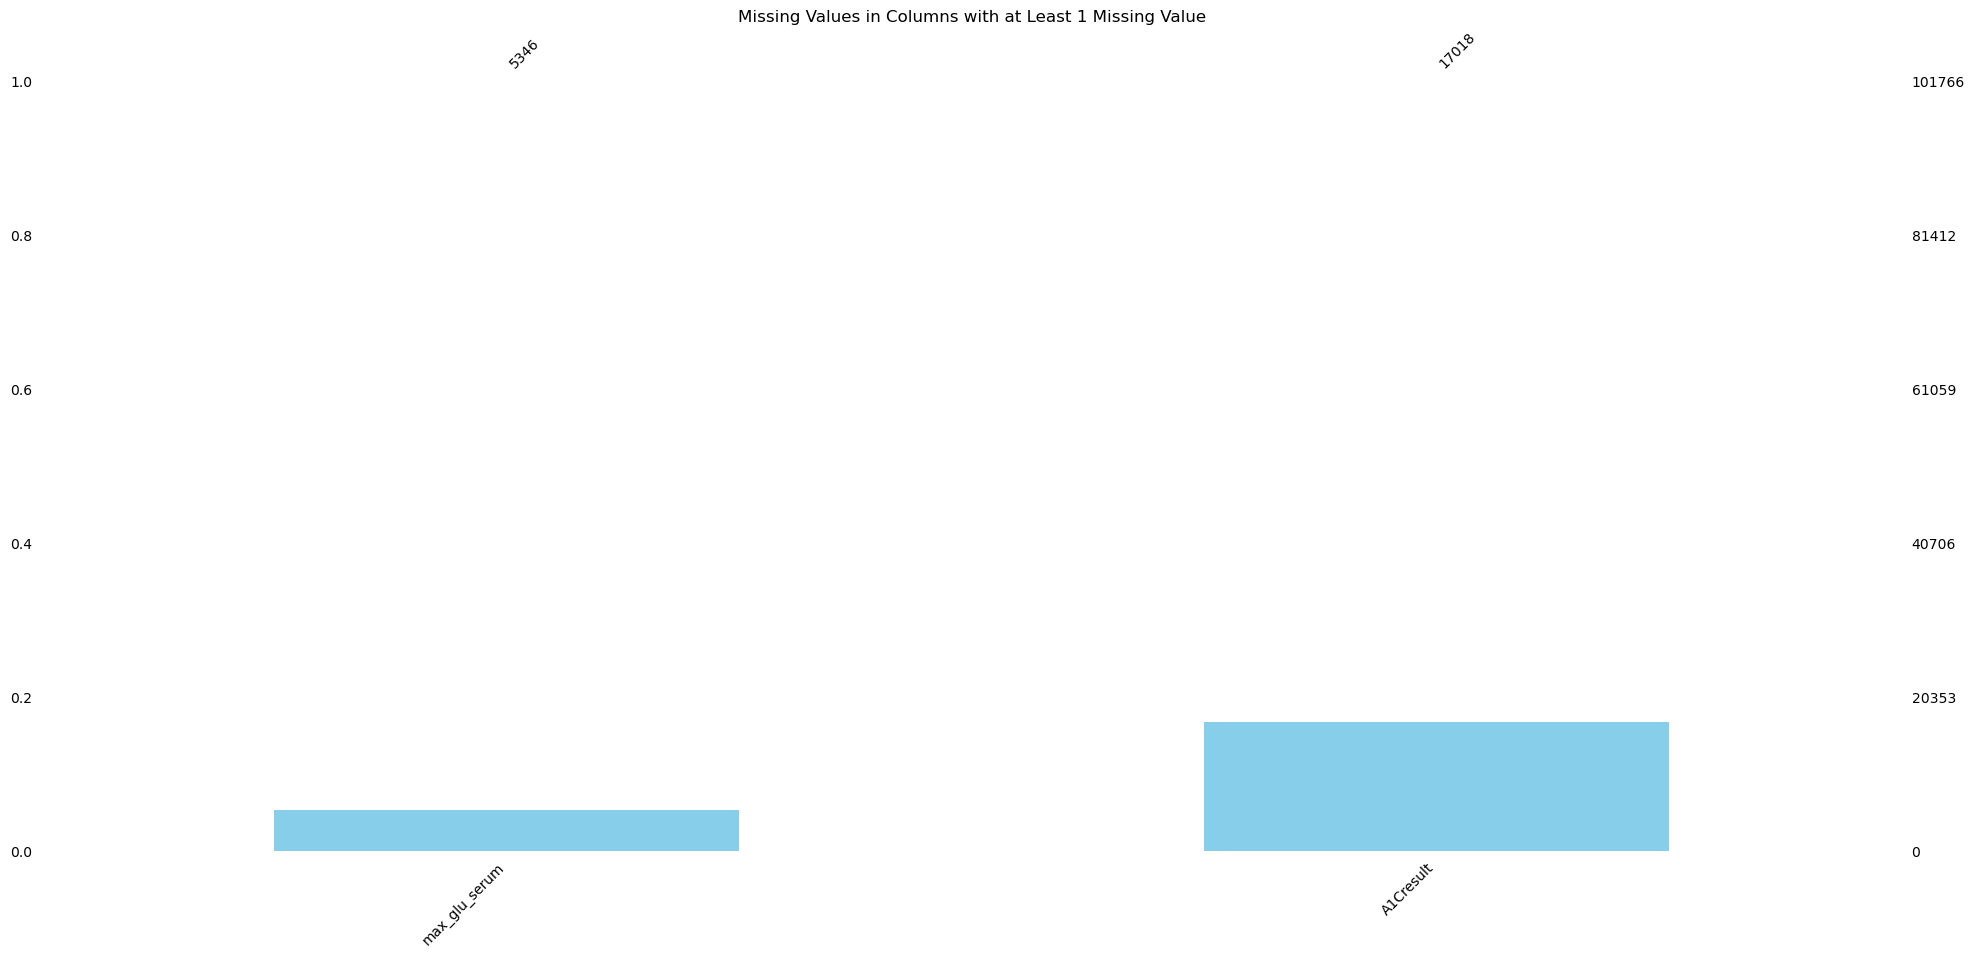

In [11]:
na_cols = df.columns[df.isnull().any()]
plt.figure(figsize=(10, 6))
msno.bar(df[na_cols], color='skyblue', sort='ascending', fontsize=10)
plt.title('Missing Values in Columns with at Least 1 Missing Value')
plt.show()

In [42]:
columns_with_question_mark = [col for col in df.columns if '?' in df[col].astype(str).unique()]
print("Columns with '?' as a response:", columns_with_question_mark)

Columns with '?' as a response: ['race', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']


### Data Preprocessing

In [15]:
unique_values_count = df.nunique()
unique_values_df = unique_values_count.to_frame().reset_index()
unique_values_df.columns = ['Column', 'Unique Values Count']
unique_values_df_sorted = unique_values_df.sort_values(by='Unique Values Count', ascending=False)

unique_values_df_sorted

,Column,Unique Values Count
0,encounter_id,101766
1,patient_nbr,71518
20,diag_3,790
19,diag_2,749
18,diag_1,717
12,num_lab_procedures,118
14,num_medications,75
11,medical_specialty,73
15,number_outpatient,39
16,number_emergency,33


In [43]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'encounter_id': [  2278392    149190     64410 ... 443854148 443857166 443867222]
Unique values in column 'patient_nbr': [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
Unique values in column 'race': ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
Unique values in column 'gender': ['Female' 'Male' 'Unknown/Invalid']
Unique values in column 'age': ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
Unique values in column 'weight': ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
Unique values in column 'admission_type_id': [6 1 2 3 4 5 8 7]
Unique values in column 'discharge_disposition_id': [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
Unique values in column 'admission_source_id': [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
Unique values in column 'time_in_hospital': [ 1  3  2  4  

Noticed many features have a '?' response which is unknown so I will replace those with NaN and analyze further

In [36]:
df2 = df.replace('?', np.nan)  

In [37]:
df2

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,0
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,0
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,0
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,0


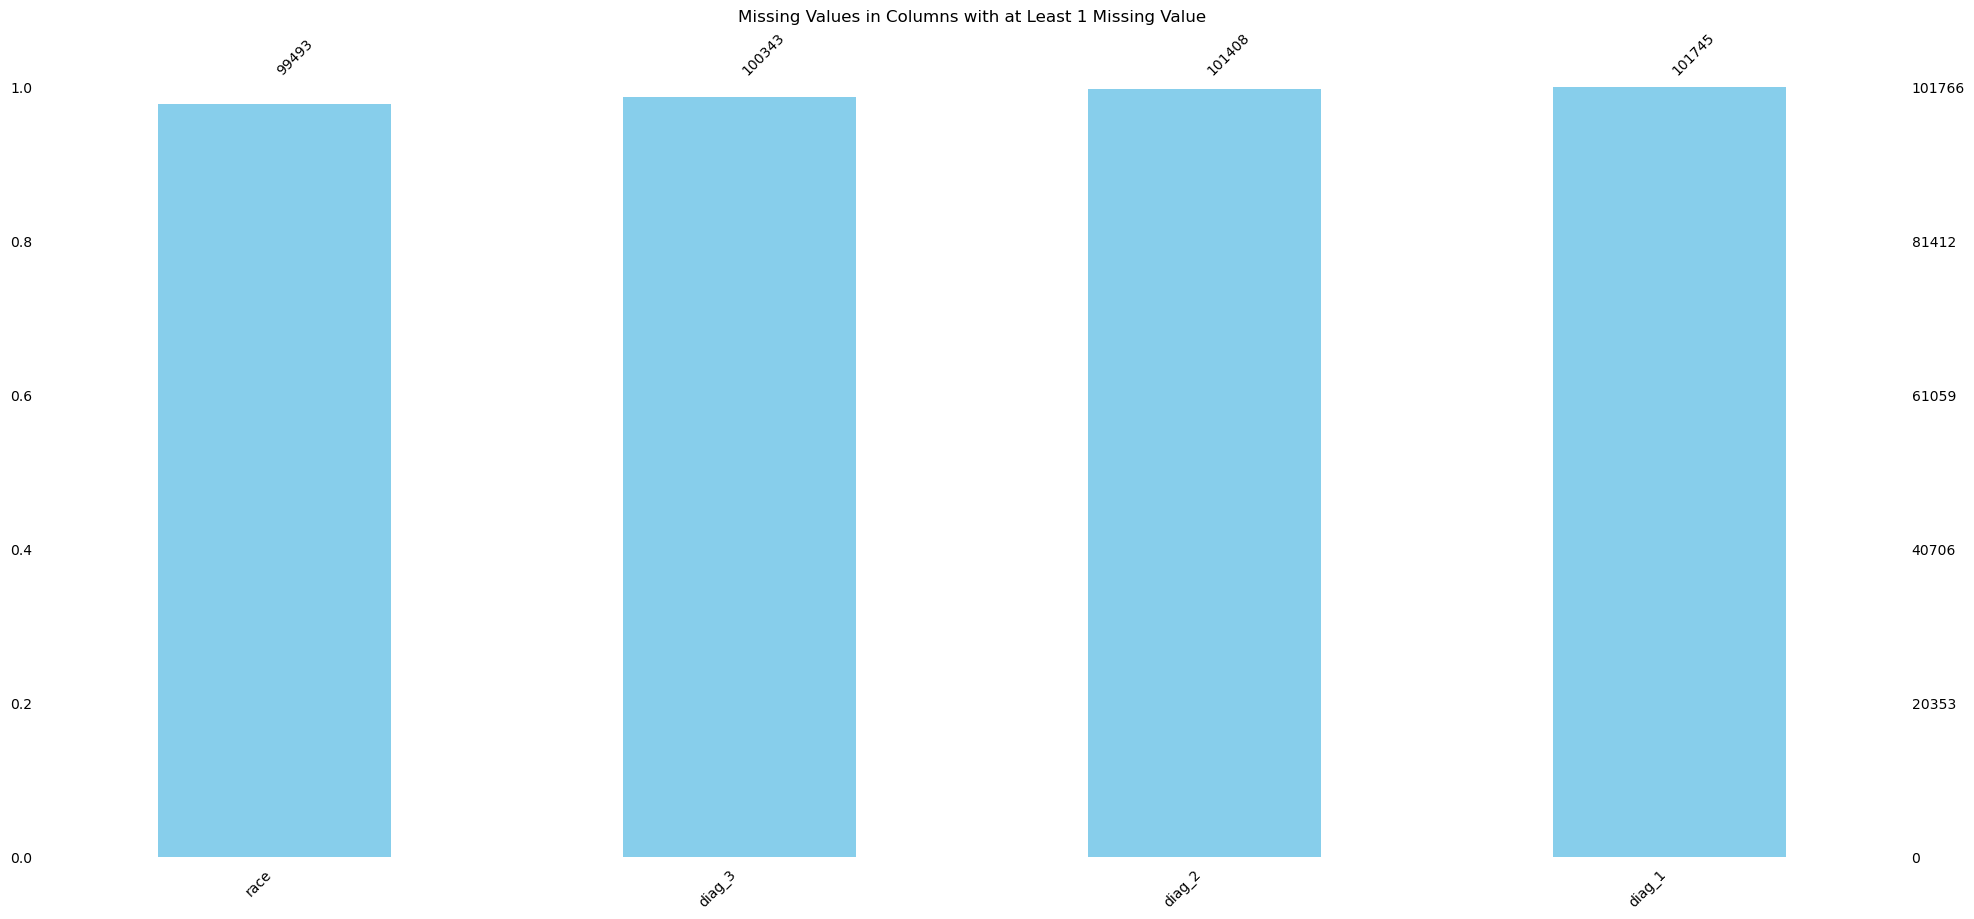

In [40]:
na_cols2 = df2.columns[df2.isnull().any()]
plt.figure(figsize=(10, 6))
msno.bar(df2[na_cols], color='skyblue', sort='ascending', fontsize=10)
plt.title('Missing Values in Columns with at Least 1 Missing Value')
plt.show()

In [41]:
na_count2 = df2.isnull().sum() 
print(na_count)

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [39]:
for column in df2.columns:
    unique_values = df2[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'encounter_id': [  2278392    149190     64410 ... 443854148 443857166 443867222]
Unique values in column 'patient_nbr': [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
Unique values in column 'race': ['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
Unique values in column 'gender': ['Female' 'Male' 'Unknown/Invalid']
Unique values in column 'age': ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
Unique values in column 'weight': [nan '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
Unique values in column 'admission_type_id': [6 1 2 3 4 5 8 7]
Unique values in column 'discharge_disposition_id': [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
Unique values in column 'admission_source_id': [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
Unique values in column 'time_in_hospital': [ 1  3  2  4  

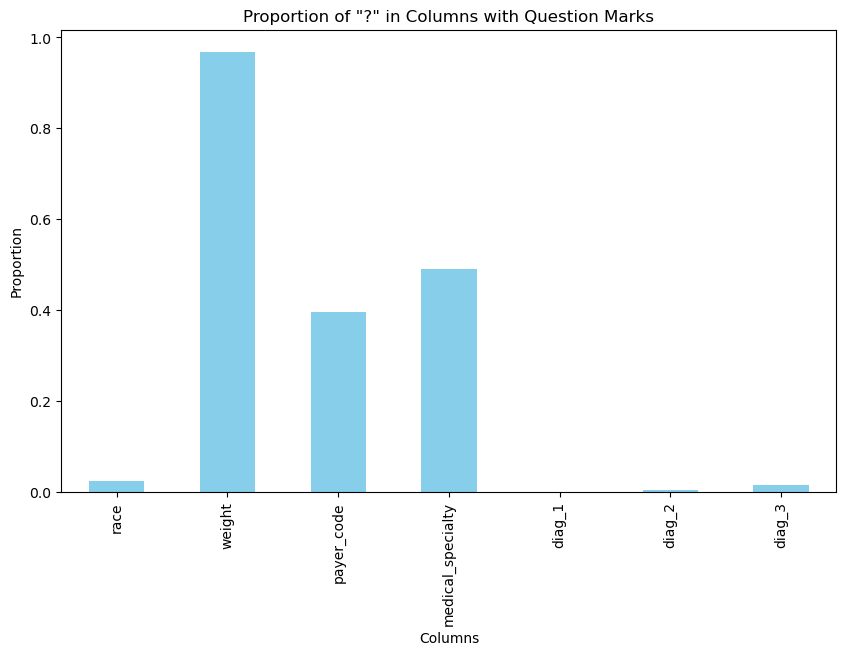

In [39]:
question_columns = df.columns[df.eq('?').any()]
question_prop = (df[question_columns] == '?').mean()
plt.figure(figsize=(10, 6))
question_prop.plot(kind='bar', color='skyblue')
plt.title('Proportion of "?" in Columns with Question Marks')
plt.xlabel('Columns')
plt.ylabel('Proportion')
plt.show()

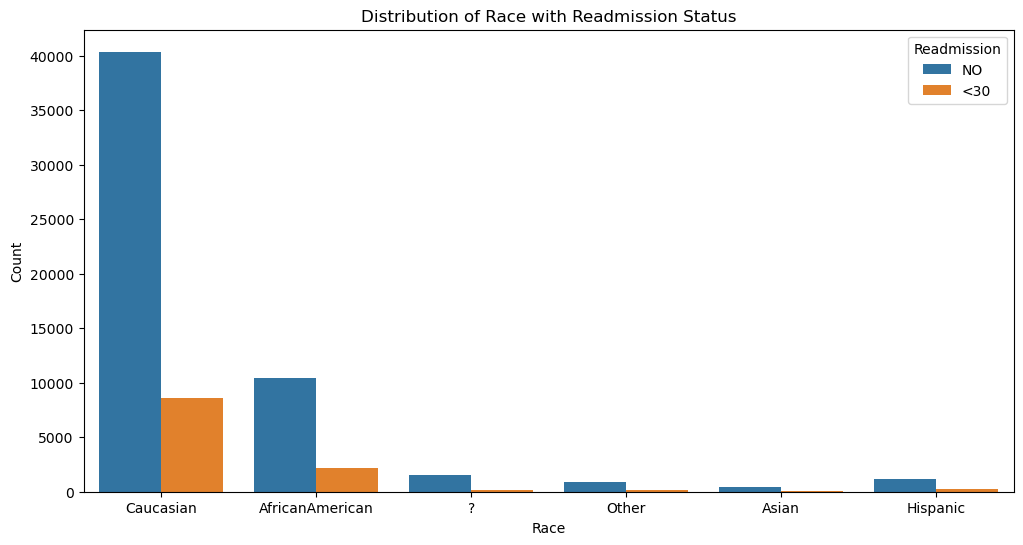

In [48]:


plt.figure(figsize=(12, 6))
sns.countplot(x='race', hue='readmitted', data=df, hue_order=['NO', '<30'])
plt.title('Distribution of Race with Readmission Status') 
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Readmission', loc='upper right', labels=['NO', '<30'])
plt.show()

In [3]:
df.diag_1.value_counts()

diag_1
428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
373       1
314       1
684       1
217       1
V51       1
Name: count, Length: 717, dtype: int64

In [44]:
cols_to_replace = ['diag_1', 'diag_2', 'diag_3', 'race', 'max_glu_serum', 'A1Cresult']
df.replace('?', np.nan, inplace=True)

# Create a new DataFrame with counts and proportions of '?' in each specified column
missing_proportions = pd.DataFrame({col: df[col].isnull().mean() for col in cols_to_replace}, index=['proportion'])


# Display the new DataFrame
missing_proportions 


,diag_1,diag_2,diag_3,race,max_glu_serum,A1Cresult
proportion,0.000206,0.003518,0.013983,0.022336,0.947468,0.832773


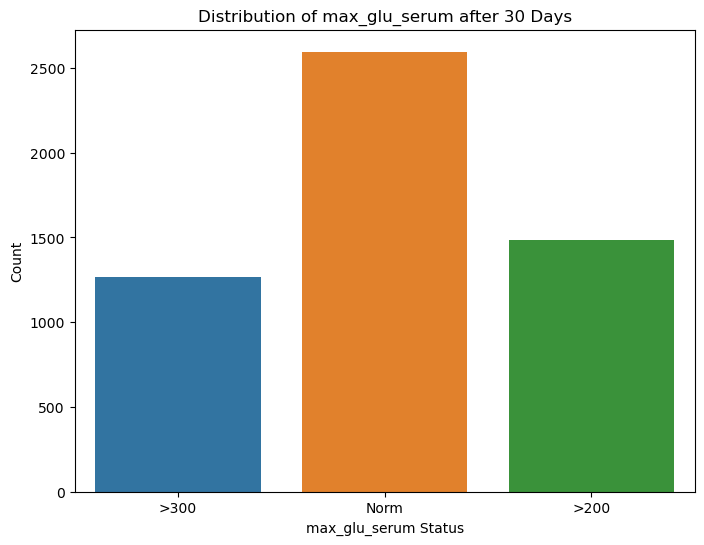

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='max_glu_serum', data=df)
plt.title('Distribution of max_glu_serum after 30 Days')
plt.xlabel('max_glu_serum Status')
plt.ylabel('Count')
plt.show()

### Remove Unnecessary/Unusable Features

In [45]:
cols_remove = ['max_glu_serum', 'A1Cresult', 'encounter_id', 'patient_nbr', 'medical_specialty', 'payer_code', 'weight']
df2 = df.drop(columns=cols_remove)

In [48]:
na_cols = ['diag_1', 'diag_2', 'diag_3', 'race']
df2 = df2.dropna(subset=na_cols)


In [49]:
df2.shape

(98053, 43)

#### Categorical Features EDA 

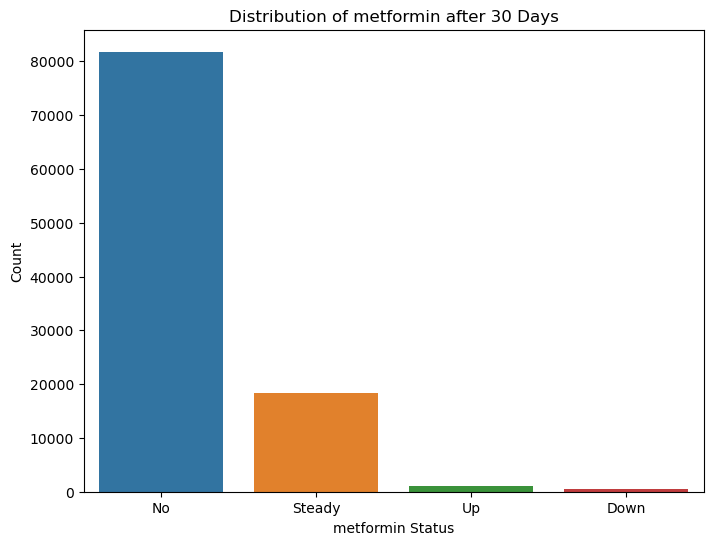

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x='metformin', data=df)
plt.title('Distribution of metformin after 30 Days')
plt.xlabel('metformin Status')
plt.ylabel('Count')
plt.show()

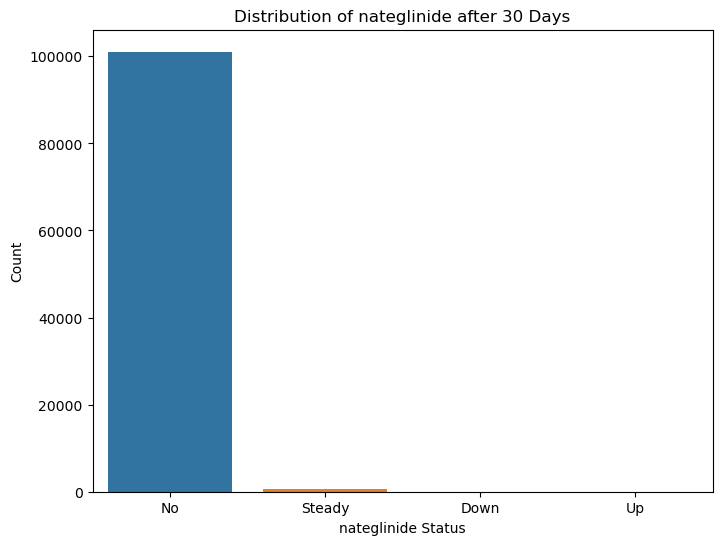

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='nateglinide', data=df)
plt.title('Distribution of nateglinide after 30 Days')
plt.xlabel('nateglinide Status')
plt.ylabel('Count')
plt.show()

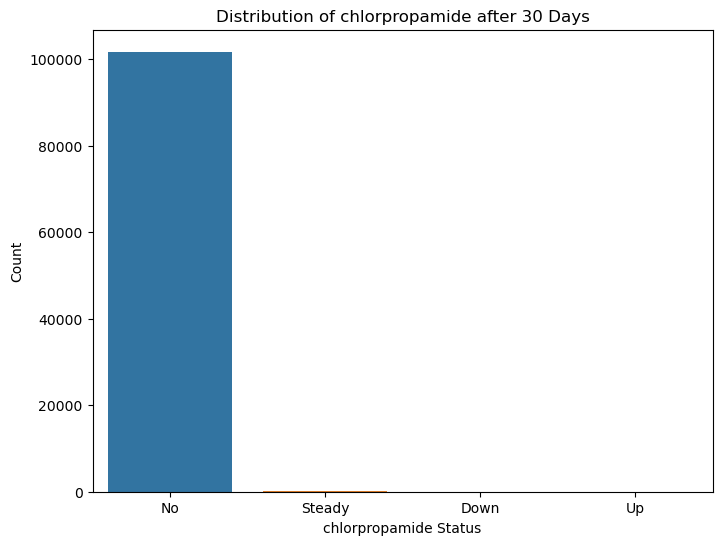

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x='chlorpropamide', data=df)
plt.title('Distribution of chlorpropamide after 30 Days')
plt.xlabel('chlorpropamide Status')
plt.ylabel('Count')
plt.show()

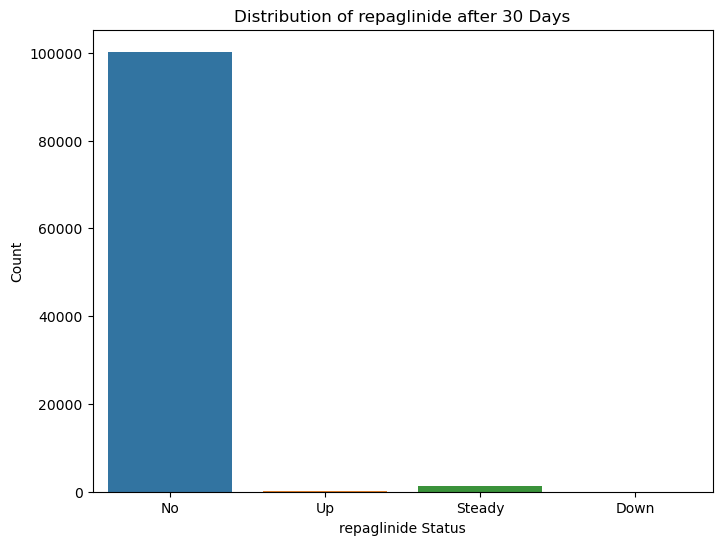

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(x='repaglinide', data=df)
plt.title('Distribution of repaglinide after 30 Days')
plt.xlabel('repaglinide Status')
plt.ylabel('Count')
plt.show()

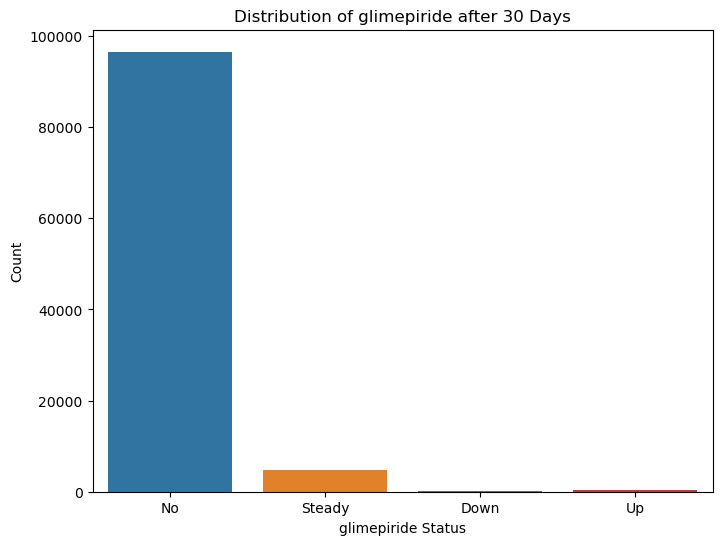

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(x='glimepiride', data=df)
plt.title('Distribution of glimepiride after 30 Days')
plt.xlabel('glimepiride Status')
plt.ylabel('Count')
plt.show()

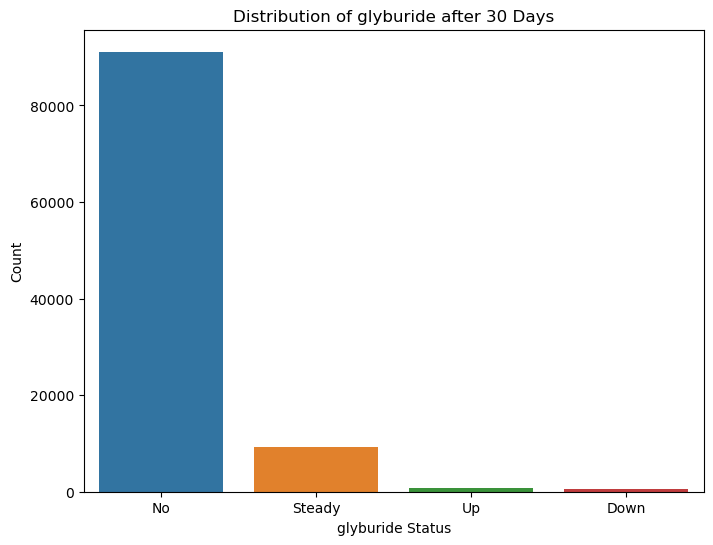

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(x='glyburide', data=df)
plt.title('Distribution of glyburide after 30 Days')
plt.xlabel('glyburide Status')
plt.ylabel('Count')
plt.show()

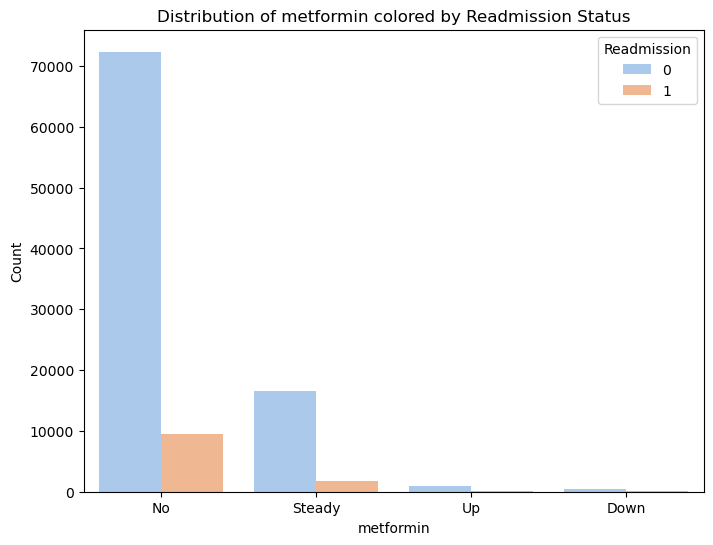

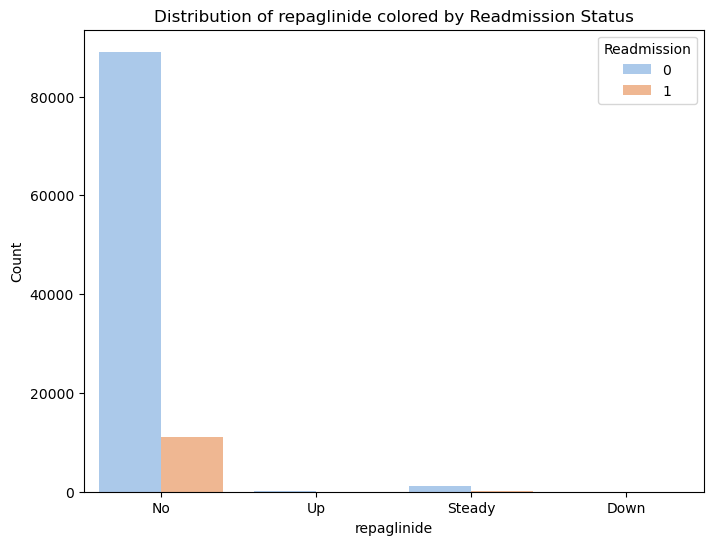

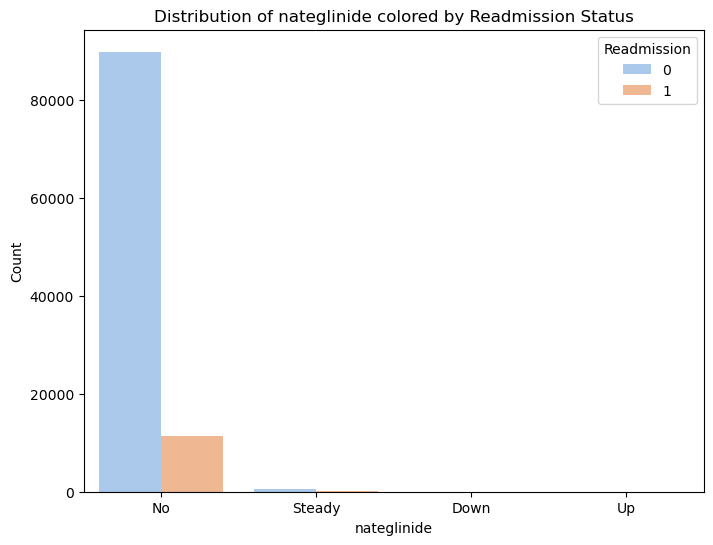

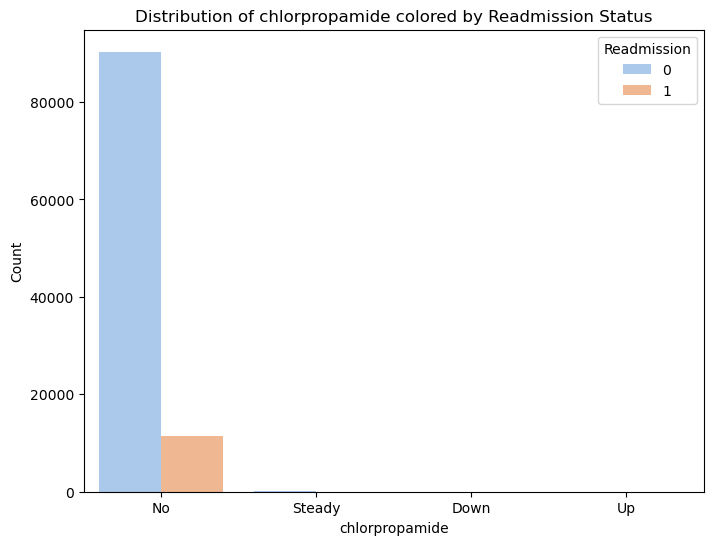

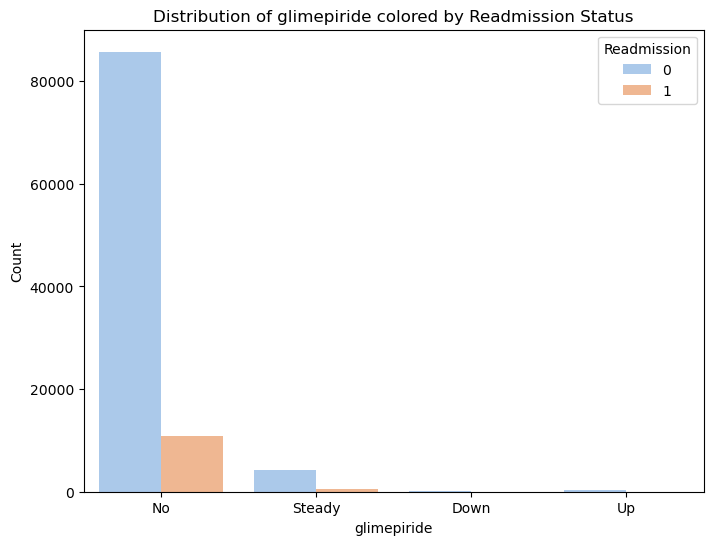

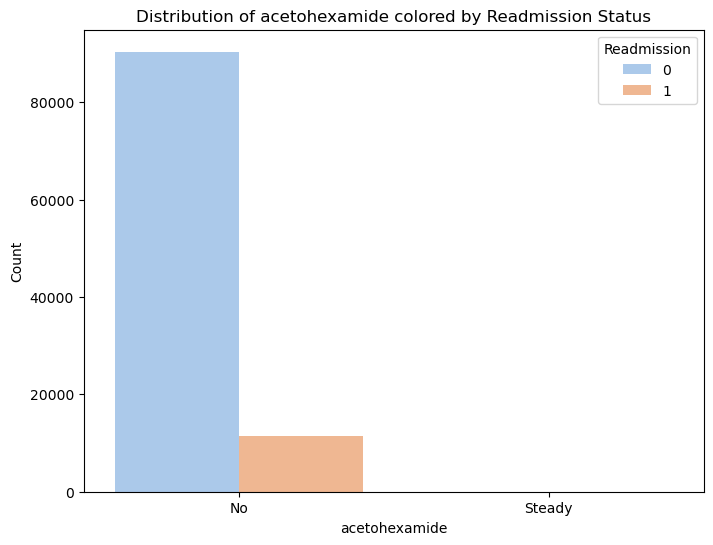

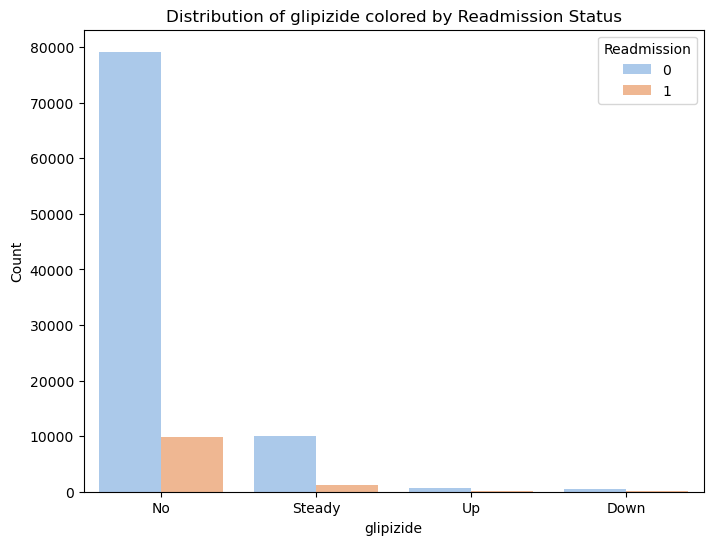

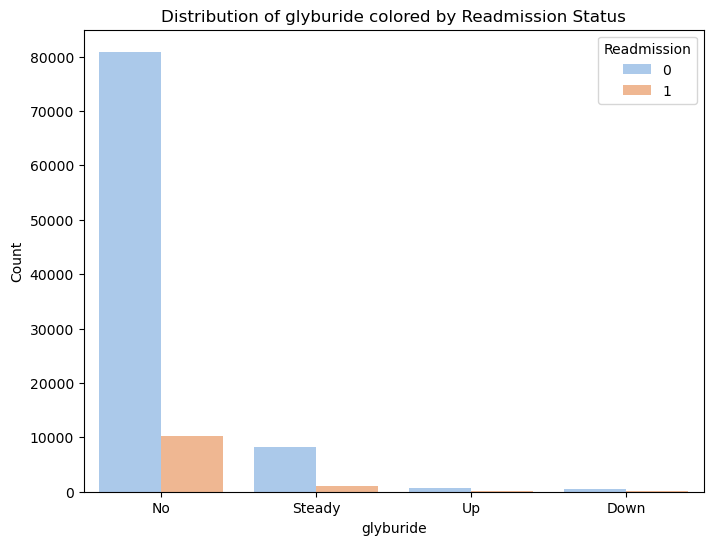

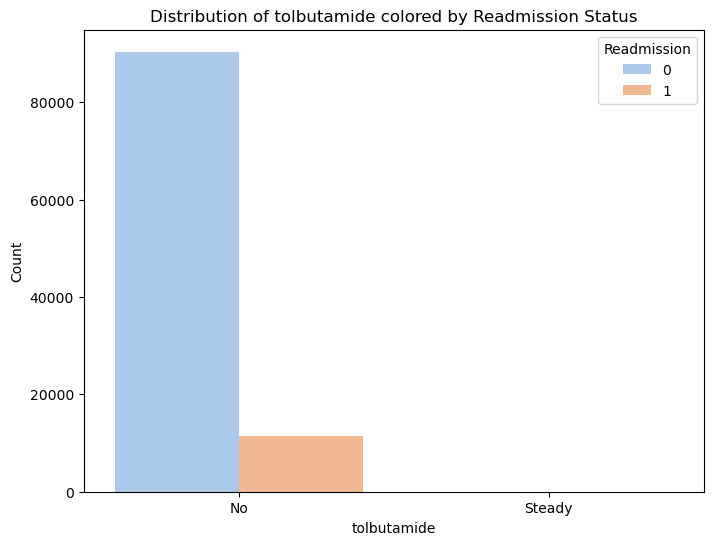

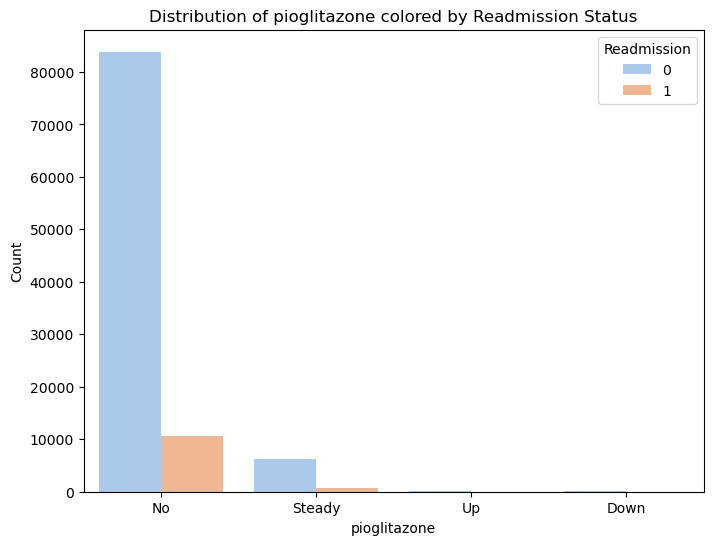

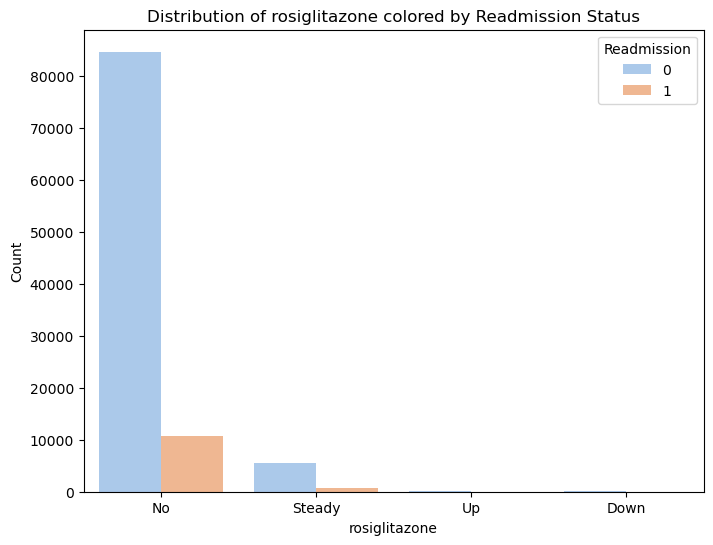

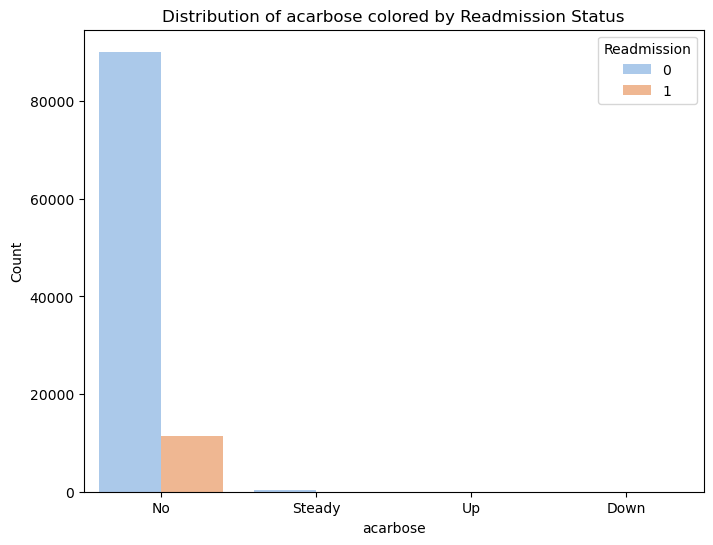

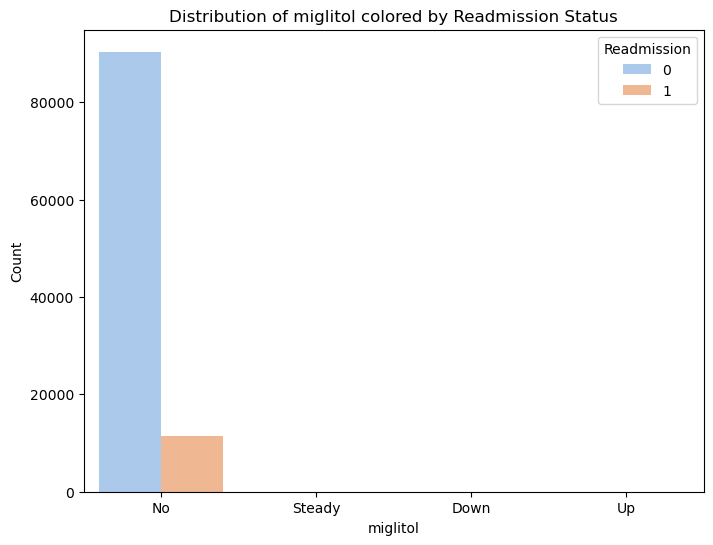

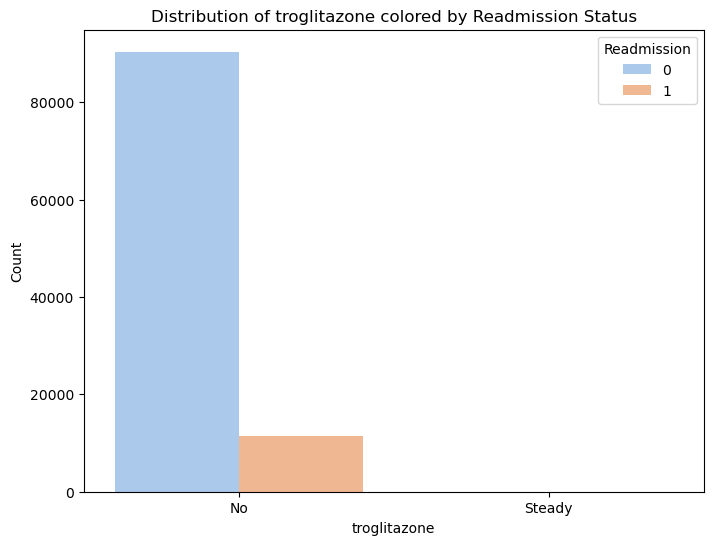

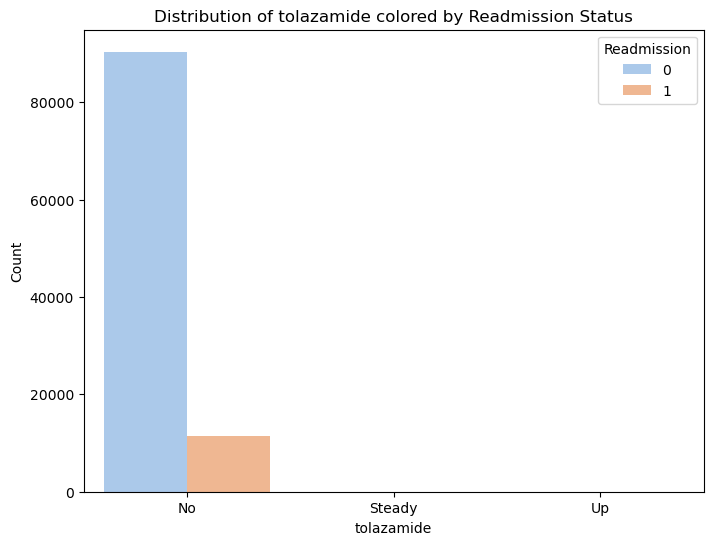

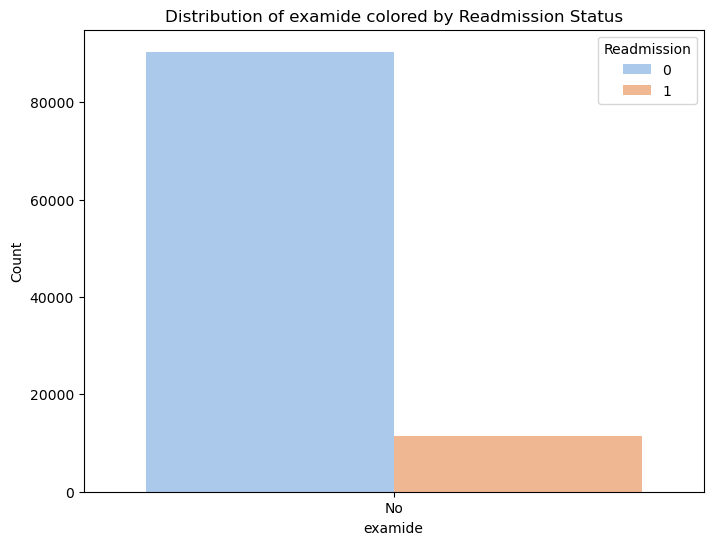

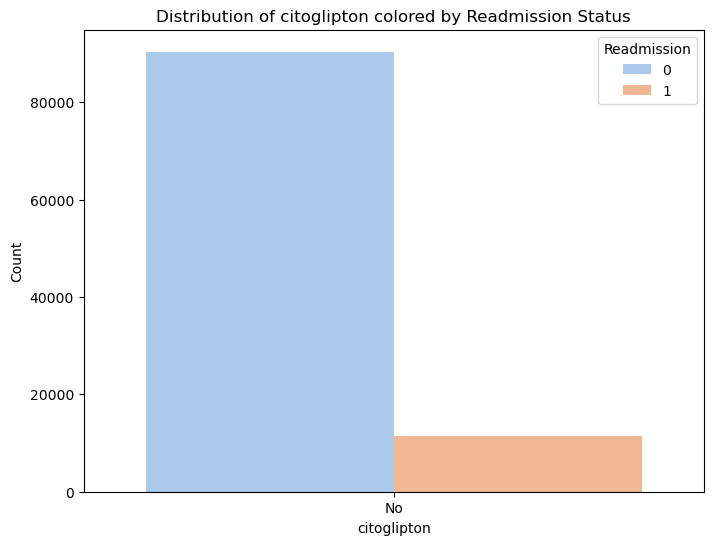

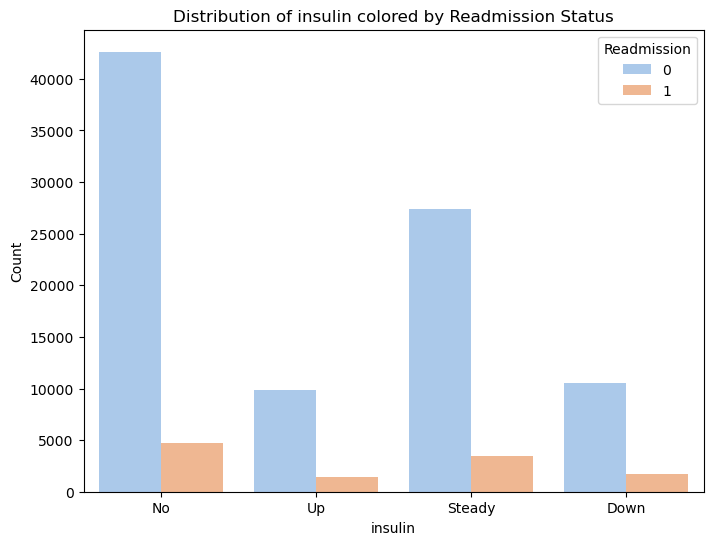

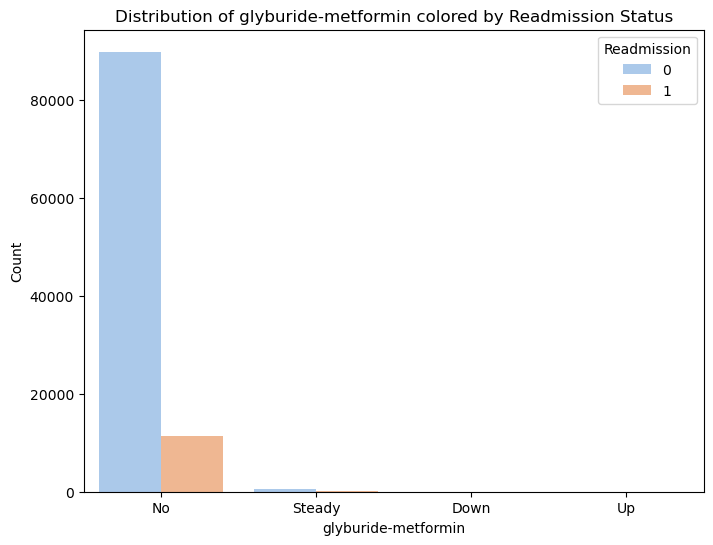

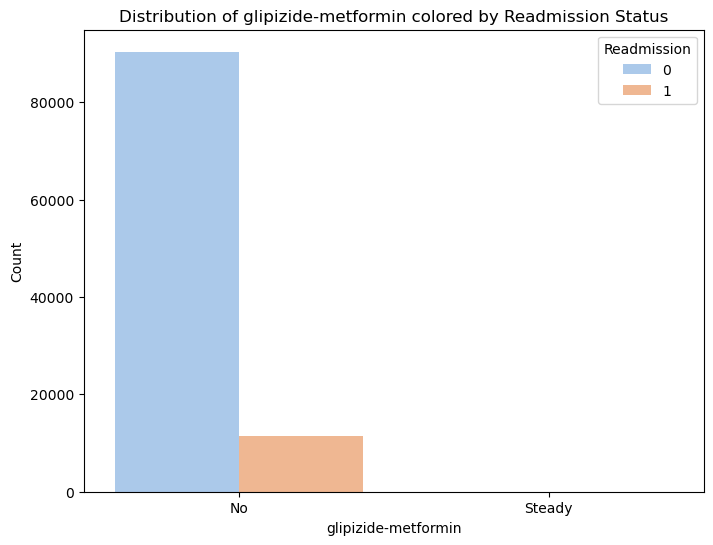

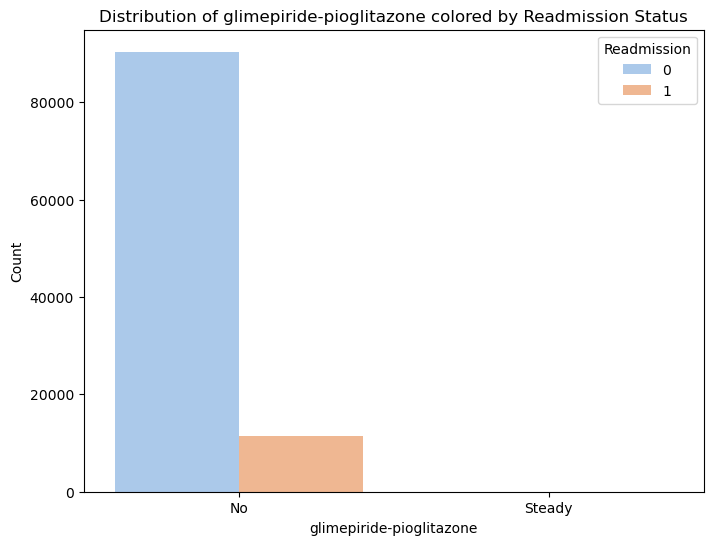

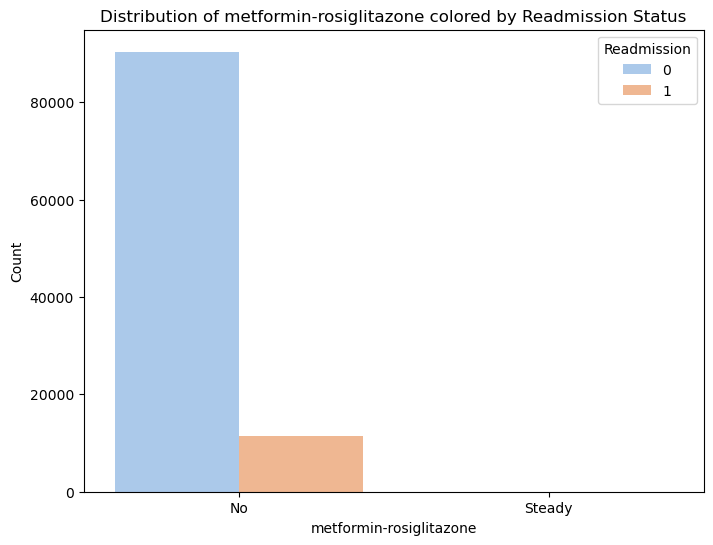

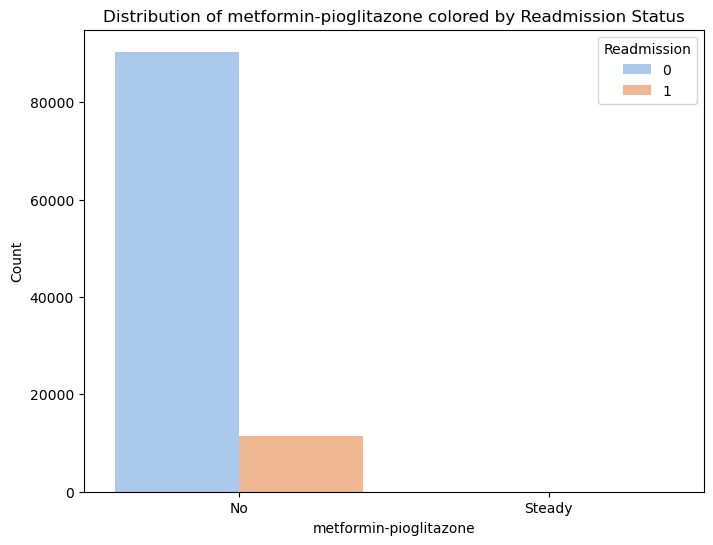

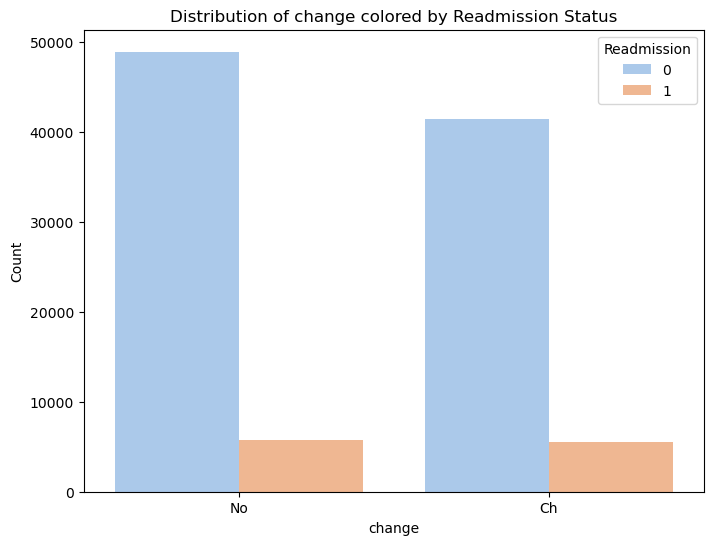

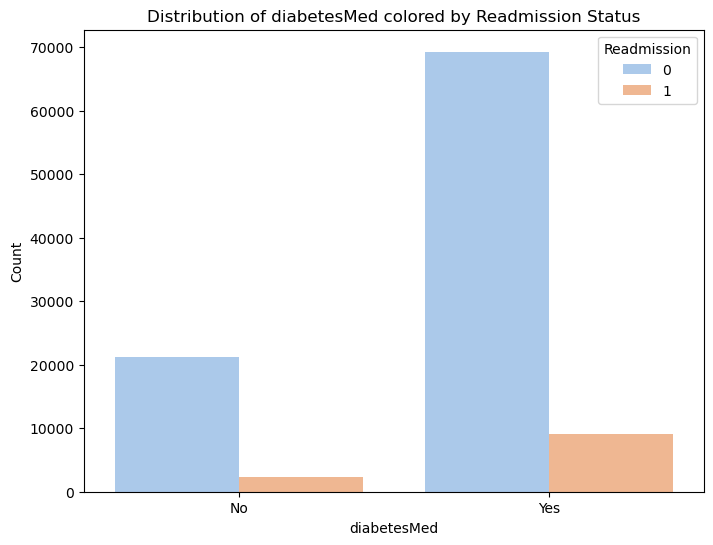

In [50]:
for column in ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
               'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
               'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
               'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
               'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
               'metformin-pioglitazone', 'change', 'diabetesMed']:
    plt.figure(figsize=(8, 6))
    
    # Convert 'readmitted' to string to avoid the AttributeError
    df2['readmitted'] = df2['readmitted'].astype(str)
    
    sns.countplot(x=column, hue='readmitted', data=df2, palette='pastel')
    plt.title(f'Distribution of {column} colored by Readmission Status')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Readmission', loc='upper right')
    plt.show()

### Encode Categorical Variables

In [50]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df2.select_dtypes(include=['object']).columns.tolist()

label_encoder = LabelEncoder()
for column in categorical_columns:
    df2[column] = label_encoder.fit_transform(df2[column].astype(str))

df2



,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2,0,1,1,1,7,3,59,0,18,...,0,3,1,0,0,0,0,0,1,0
2,0,0,2,1,1,7,2,11,5,13,...,0,1,1,0,0,0,0,1,1,0
3,2,1,3,1,1,7,2,44,1,16,...,0,3,1,0,0,0,0,0,1,0
4,2,1,4,1,1,7,1,51,0,8,...,0,2,1,0,0,0,0,0,1,0
5,2,1,5,2,1,2,3,31,6,16,...,0,2,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,1,7,1,3,7,3,51,0,16,...,0,0,1,0,0,0,0,0,1,0
101762,0,0,8,1,4,5,5,33,3,18,...,0,2,1,0,0,0,0,1,1,0
101763,2,1,7,1,1,7,1,53,0,9,...,0,0,1,0,0,0,0,0,1,0
101764,2,0,8,2,3,7,10,45,2,21,...,0,3,1,0,0,0,0,0,1,0


In [8]:
for column in df2.columns:
    unique_values = df2[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'race': [2 0 5 4 1 3]
Unique values in column 'gender': [0 1 2]
Unique values in column 'age': [0 1 2 3 4 5 6 7 8 9]
Unique values in column 'admission_type_id': [6 1 2 3 4 5 8 7]
Unique values in column 'discharge_disposition_id': [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
Unique values in column 'admission_source_id': [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
Unique values in column 'time_in_hospital': [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
Unique values in column 'num_lab_procedures': [ 41  59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29
  35  42  66  36  19  64  25  53  52  87  27  37  46  28  48  72  10   2
  65  67  40  54  58  57  43  32  83  34  39  69  38  56  22  96  78  61
  88  50   1  18  82   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26   5  95  97  84  14  74 105  86
  98  20   6  94   8 102 100   7  89  91  92   4 101  99 114 113

In [14]:
na_count2 = df2.isnull().sum() 
print(na_count2)

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipto

In [51]:
df2.shape

(98053, 43)

## Logistic Regression 

In [52]:
#### Separate features (X) and target variable (y) 
X = df2.drop(columns=['readmitted'])
y = df2['readmitted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:

from sklearn.model_selection import cross_val_score
lg_model = LogisticRegression(max_iter=10000, random_state=42) 

cv_score = cross_val_score(lg_model, X_train_scaled, y_train, cv=10, scoring='accuracy').mean()
cv_score

0.8868208540081624

In [96]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
cf = confusion_matrix(y_test, y_pred)
cf

array([[17381,    27],
       [ 2176,    27]])

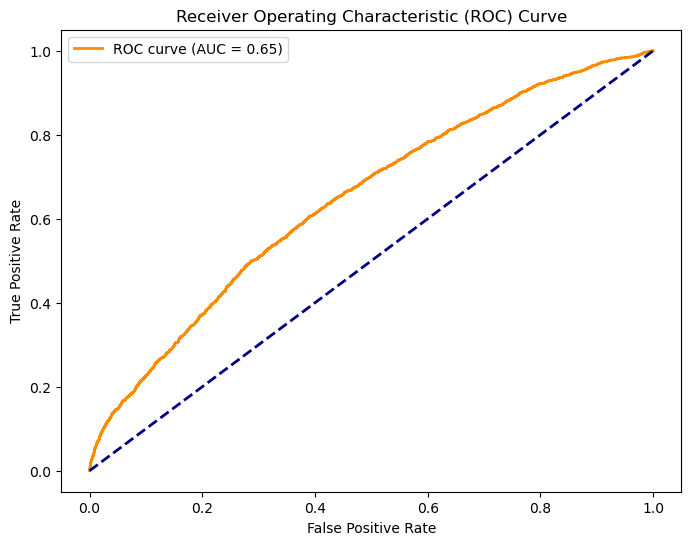

In [91]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, lg_model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

/Users/carolinacraus/anaconda3/envs/quant-env/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


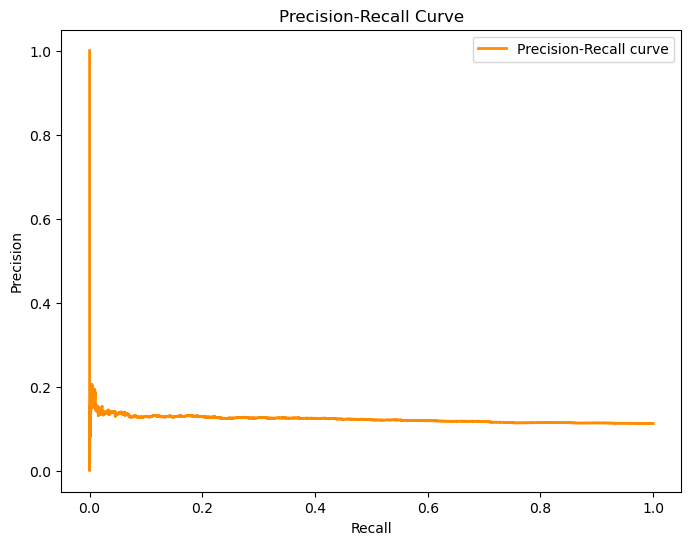

In [72]:
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

### Naive Bayes

In [76]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_score = cross_val_score(nb_model, X_train, y_train, cv=10, scoring='accuracy').mean()
nb_score 

0.723872419444951

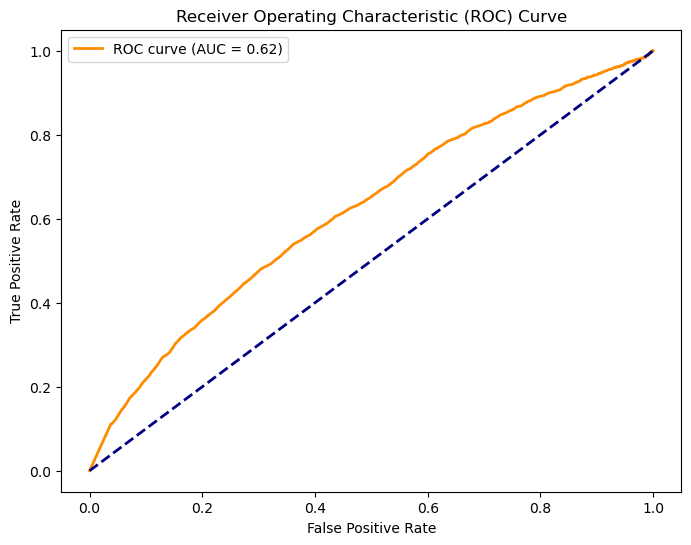

In [90]:
# ROC Curve
fpr2, tpr2, thresholds2 = roc_curve(y_test, nb_model.predict_proba(X_test_scaled)[:, 1])
roc_auc2 = auc(fpr2, tpr2)

plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc2))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

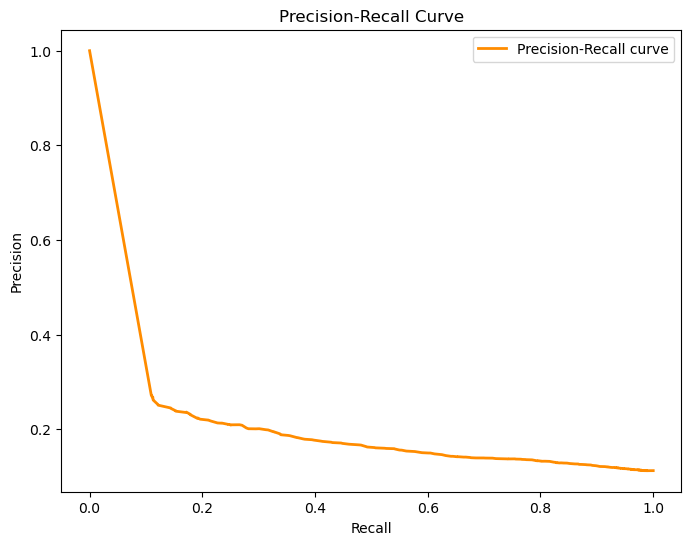

In [89]:
precision2, recall2, _ = precision_recall_curve(y_test, nb_model.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall2, precision2, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

### Random Forest 

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_score = cross_val_score(rf_model, X_train_scaled, y_train, cv=10, scoring='accuracy').mean()
rf_score 

0.8871267878506595

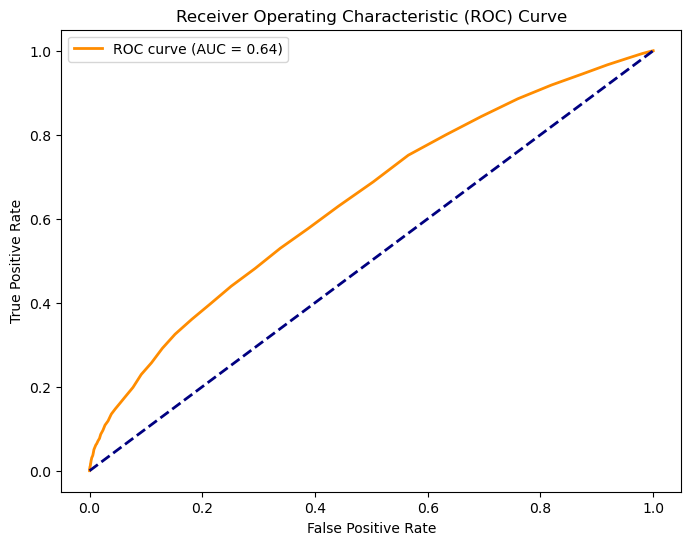

In [92]:
# ROC Curve
fpr3, tpr3, thresholds3 = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
roc_auc3 = auc(fpr3, tpr3)

plt.figure(figsize=(8, 6))
plt.plot(fpr3, tpr3, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc3))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Assess Performance 

In [87]:
lg_model.fit(X_train_scaled, y_train)
nb_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

lg_predictions = lg_model.predict(X_test_scaled)
nb_predictions = nb_model.predict(X_test_scaled)
rf_predictions = rf_model.predict(X_test_scaled)

# Confusion matrices
lg_cm = confusion_matrix(y_test, lg_predictions)
nb_cm = confusion_matrix(y_test, nb_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)

# Classification reports
lg_report = classification_report(y_test, lg_predictions)
nb_report = classification_report(y_test, nb_predictions)
rf_report = classification_report(y_test, rf_predictions)

### Feature Importance 

In [94]:
feature_names = X.columns

# Get coefficients and create a DataFrame
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lg_model.coef_[0]
})

# Sort the DataFrame by absolute coefficient values
coefficients['Absolute_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Absolute_Coefficient', ascending=False)

In [95]:
coefficients


,Feature,Coefficient,Absolute_Coefficient
12,number_inpatient,0.324798,0.324798
4,discharge_disposition_id,0.126563,0.126563
41,diabetesMed,0.086261,0.086261
16,number_diagnoses,0.080967,0.080967
36,glipizide-metformin,-0.076265,0.076265
17,metformin,-0.070271,0.070271
6,time_in_hospital,0.055204,0.055204
8,num_procedures,-0.049196,0.049196
30,troglitazone,-0.045705,0.045705
9,num_medications,0.043965,0.043965
